<a href="https://colab.research.google.com/github/Ranya-Alghamdi-1/T5/blob/main/Ensemble_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


In [6]:
df = pd.read_csv('/content/drive/MyDrive/T5/Week 3-DB/1-Weekly Task-20240811T051244Z-001/1-Weekly Task/Datasets/Traffic_Jams.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [9]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [13]:
df.describe(include='object')

,Time,Day of the week,Traffic Situation
count,6324,6324,6324
unique,96,7,4
top,9:30:00 PM,Thursday,normal
freq,77,1020,3858


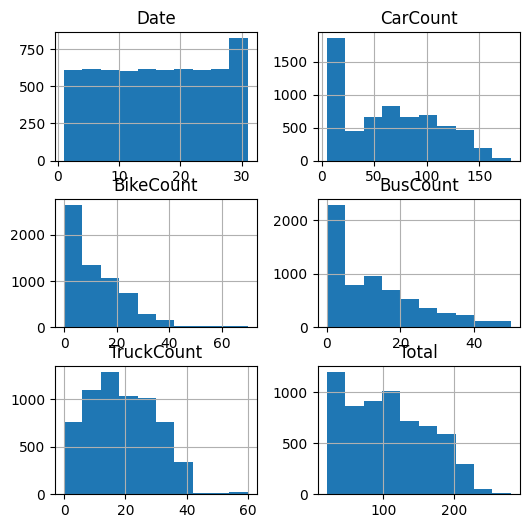

In [16]:
df.hist(figsize=(6,6))
plt.show()

In [18]:
df["Traffic Situation"].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [21]:
df["Traffic Situation"].value_counts()

,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


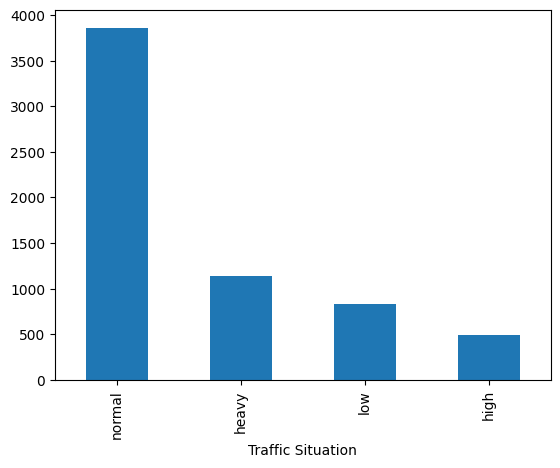

In [20]:
#Analyze the distribution of the target variable Traffic Situation
df["Traffic Situation"].value_counts().plot(kind='bar')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [12]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [30]:
df.duplicated().sum()

0

In [31]:
# Conver the datatype for each col i need
df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-31-38933e8b80a8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [33]:
#Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

for i in ['Day of the week','Traffic Situation']:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [34]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CarCount','BikeCount','BusCount','TruckCount','Total','Day of the week']] = scaler.fit_transform(df[['CarCount','BikeCount','BusCount','TruckCount','Total','Day of the week']])

In [35]:
#Remove Unnecessary Columns
df.drop(['Time','Date'],axis=1,inplace=True)

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

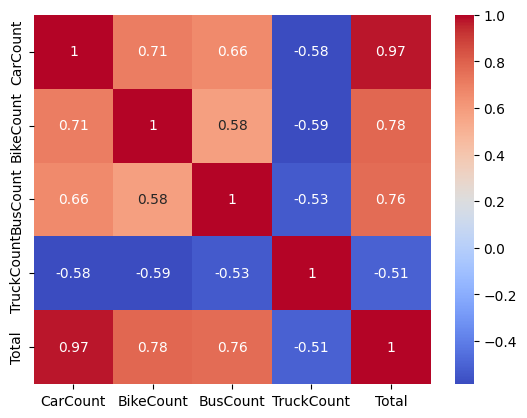

In [36]:
col=df[['CarCount','BikeCount','BusCount','TruckCount','Total']] # Use a list to select multiple columns
correlation_matrix = col.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

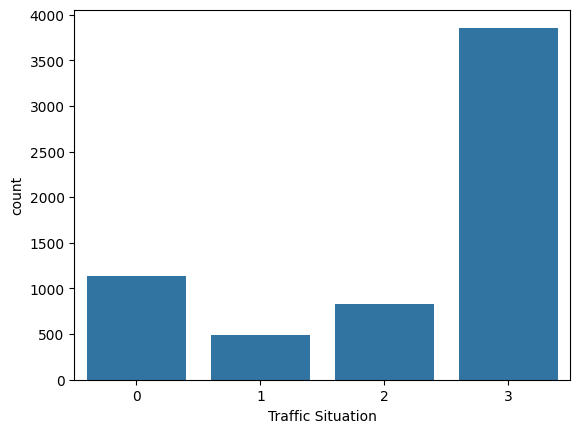

In [37]:
#Count Plots for Traffic Situation colunm after scaling & encoding
sns.countplot(x='Traffic Situation',data=df)
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [38]:
#The target colunm
X = df.drop('Traffic Situation',axis=1)
y = df['Traffic Situation']

#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [39]:
#Import
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Chose the bagging model
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = bagging_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Evaluate the model performance

In [40]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Bagging Classifier Model Accuracy: {accuracy * 100:.2f}%')

Bagging Classifier Model Accuracy: 90.04%


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [41]:
# By using the XGBoost classifier model
#Import
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [42]:
xgb_classifier = XGBClassifier(n_estimators=50, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_classifier.predict(X_test)


### Evaluate the model performance

In [43]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'XGBoost Classifier Model Accuracy: {accuracy * 100:.2f}%')

XGBoost Classifier Model Accuracy: 90.28%


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [46]:
#combine the previous classifiers as the base models using a Stacking Classifier
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC()),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier())
]

### Define meta-learner (LogisticRegression)

In [47]:
meta_learner = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [ ]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5) #cv=5 Cross Validation

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = stacking_classifier.predict(X_test)

### Evaluate the model performance

In [49]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Stacking Classifier Model Accuracy: {accuracy * 100:.2f}%')

Stacking Classifier Model Accuracy: 92.41%


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?

   Answer : 3 features are important while I visualize the heatmap correlation:
CarCount, BikeCount, Total

   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

   Answer : I just did scaling for the features, also I dropped any features that are not imported into the dataset like date and time


* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

Answer: Bagging Classifier Model Accuracy: 90.04%

XGBoost Classifier Model Accuracy: 90.28%

Stacking Classifier Model Accuracy: 92.41%

Reasons for Choosing :
Bagging: I chose Bagging to reduce variance by averaging multiple decision trees.

 Boosting: XGBoost was selected for its ability to improve model performance by focusing on correcting the errors made by the previous model.

Stacking: The Stacking Classifier was chosen to leverage the strengths of multiple models, by combining their predictions using a meta-learner.

-
Answer: Ensemble methods generally provide better generalization performance than individual models This results in more robust and accurate predictions.


* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why?

   Answer: I used the accuracy score as the primary evaluation metric.

What insights did these metrics provide about the models' strengths and weaknesses?

Answer: Among the models, the Stacking Classifier performed the best with an accuracy of 92.41%.

The accuracy scores indicate that all models performed well, but the Stacking Classifier had a clear advantage.
